In [1]:
import os
from typing import List
import itertools
import multiprocessing as mpp
from multiprocessing import Pool 
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from statsmodels.sandbox.stats.multicomp import multipletests

from screen_simulation.SimulatedScreen import SimulatedScreen
from screen_simulation.simulate import *
from screen_simulation.run_mageck import *

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#from plot import *

In [51]:
plt.style.use('jr')
plt.rcParams["pdf.use14corefonts"] = True
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams["axes.unicode_minus"] = False

In [2]:
n_guides = 3500

mean_coverages = [100, 250, 500, 1000]
coverages = [i*n_guides for i in mean_coverages]

sorting_mode = ["topbot", "bins"]

nreps = [1, 2, 4]
nreads = [10**5, 5*10**5, 10**6, int(2.5*10**6), 5*10**6]
measures = ["guide"]

In [9]:
coverages

[350000, 875000, 1750000, 3500000]

In [17]:
params = [sorting_mode, nreps, coverages, nreads]
zipped_params = list(itertools.product(*params))

### Run simulation and write read counts & mageck results

In [4]:
len(zipped_params)

120

In [5]:
def _run_mageck(sorting_mode, rep, cov, nread, measure):
    sim = SimulatedScreen(sorting_mode=sorting_mode, nreps=rep, n_reads_per_sample=nread, scale_by_accessibility=True, scale_with_variability=True, )
    sim.simulate_reps()
    run_mageck(sim, 0, measure,)

In [8]:
with Pool(10) as pool:
    iterable = [(i, 'x') for i in range(10)]
    pool.starmap(_run_mageck, tqdm(zipped_params, total=len(zipped_params)))

100%|██████████| 30/30 [00:00<00:00, 19750.29it/s]


In [ ]:
def fn(sorting_mode, rep, cov, nread):
    sens, res = get_mageck_sensitivity(sorting_mode=sorting_mode, nreps=rep, n_reads_per_sample=nread, scale_by_accessibility=True, scale_with_variability=True, n_total_cells = cov, rerun=True)
    return((sens, res))

results = []
#with Pool(10) as pool:
#    result = pool.starmap(fn, tqdm(zipped_params, total=len(zipped_params)))
for params in tqdm(zipped_params):
    results.append(fn(*params))


  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_100000_0.tsv



 10%|█         | 1/10 [00:11<01:40, 11.22s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_100000_1.tsv



 20%|██        | 2/10 [00:22<01:29, 11.20s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_100000_2.tsv



 30%|███       | 3/10 [00:33<01:17, 11.12s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_100000_3.tsv



 40%|████      | 4/10 [00:44<01:06, 11.11s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_100000_4.tsv



 50%|█████     | 5/10 [00:55<00:55, 11.14s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_100000_5.tsv



 60%|██████    | 6/10 [01:07<00:44, 11.20s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_100000_6.tsv



 70%|███████   | 7/10 [01:18<00:33, 11.17s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_100000_7.tsv



 80%|████████  | 8/10 [01:29<00:22, 11.16s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_100000_8.tsv



 90%|█████████ | 9/10 [01:40<00:11, 11.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_500000_0.tsv



 10%|█         | 1/10 [00:11<01:42, 11.39s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_500000_1.tsv



 20%|██        | 2/10 [00:22<01:30, 11.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_500000_2.tsv



 30%|███       | 3/10 [00:34<01:19, 11.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_500000_3.tsv



 40%|████      | 4/10 [00:45<01:07, 11.29s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_500000_4.tsv



 50%|█████     | 5/10 [00:56<00:56, 11.40s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_500000_5.tsv



 60%|██████    | 6/10 [01:08<00:45, 11.43s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_500000_6.tsv



 70%|███████   | 7/10 [01:19<00:34, 11.39s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_500000_7.tsv



 80%|████████  | 8/10 [01:30<00:22, 11.36s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_500000_8.tsv



 90%|█████████ | 9/10 [01:42<00:11, 11.30s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_1000000_0.tsv



 10%|█         | 1/10 [00:11<01:44, 11.59s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_1000000_1.tsv



 20%|██        | 2/10 [00:23<01:32, 11.59s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_1000000_2.tsv



 30%|███       | 3/10 [00:34<01:20, 11.57s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_1000000_3.tsv



 40%|████      | 4/10 [00:46<01:09, 11.54s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_1000000_4.tsv



 50%|█████     | 5/10 [00:57<00:57, 11.56s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_1000000_5.tsv



 60%|██████    | 6/10 [01:09<00:46, 11.68s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_1000000_6.tsv



 70%|███████   | 7/10 [01:21<00:34, 11.59s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_1000000_7.tsv



 80%|████████  | 8/10 [01:32<00:23, 11.59s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_1000000_8.tsv



 90%|█████████ | 9/10 [01:44<00:11, 11.60s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_2500000_0.tsv



 10%|█         | 1/10 [00:12<01:51, 12.35s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_2500000_1.tsv



 20%|██        | 2/10 [00:25<01:40, 12.55s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_2500000_2.tsv



 30%|███       | 3/10 [00:37<01:27, 12.45s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_2500000_3.tsv



 40%|████      | 4/10 [00:49<01:14, 12.38s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_2500000_4.tsv



 50%|█████     | 5/10 [01:02<01:01, 12.38s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_2500000_5.tsv



 60%|██████    | 6/10 [01:14<00:49, 12.41s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_2500000_6.tsv



 70%|███████   | 7/10 [01:27<00:37, 12.45s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_2500000_7.tsv



 80%|████████  | 8/10 [01:39<00:24, 12.44s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_2500000_8.tsv



 90%|█████████ | 9/10 [01:51<00:12, 12.39s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_5000000_0.tsv



 10%|█         | 1/10 [00:13<02:02, 13.59s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_5000000_1.tsv



 20%|██        | 2/10 [00:27<01:50, 13.76s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_5000000_2.tsv



 30%|███       | 3/10 [00:41<01:36, 13.72s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_5000000_3.tsv



 40%|████      | 4/10 [00:54<01:21, 13.66s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_5000000_4.tsv



 50%|█████     | 5/10 [01:08<01:08, 13.64s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_5000000_5.tsv



 60%|██████    | 6/10 [01:21<00:54, 13.60s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_5000000_6.tsv



 70%|███████   | 7/10 [01:35<00:40, 13.60s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_5000000_7.tsv



 80%|████████  | 8/10 [01:49<00:27, 13.62s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_5000000_8.tsv



 90%|█████████ | 9/10 [02:02<00:13, 13.64s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_350000_1_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_100000_0.tsv



 10%|█         | 1/10 [00:11<01:40, 11.20s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_100000_1.tsv



 20%|██        | 2/10 [00:22<01:29, 11.20s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_100000_2.tsv



 30%|███       | 3/10 [00:33<01:19, 11.35s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_100000_3.tsv



 40%|████      | 4/10 [00:45<01:08, 11.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_100000_4.tsv



 50%|█████     | 5/10 [00:56<00:57, 11.42s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_100000_5.tsv



 60%|██████    | 6/10 [01:08<00:45, 11.35s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_100000_6.tsv



 70%|███████   | 7/10 [01:19<00:33, 11.33s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_100000_7.tsv



 80%|████████  | 8/10 [01:30<00:22, 11.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_100000_8.tsv



 90%|█████████ | 9/10 [01:42<00:11, 11.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_500000_0.tsv



 10%|█         | 1/10 [00:11<01:43, 11.48s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_500000_1.tsv



 20%|██        | 2/10 [00:23<01:32, 11.52s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_500000_2.tsv



 30%|███       | 3/10 [00:34<01:20, 11.53s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_500000_3.tsv



 40%|████      | 4/10 [00:46<01:09, 11.58s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_500000_4.tsv



 50%|█████     | 5/10 [00:57<00:57, 11.50s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_500000_5.tsv



 60%|██████    | 6/10 [01:09<00:45, 11.49s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_500000_6.tsv



 70%|███████   | 7/10 [01:20<00:34, 11.50s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_500000_7.tsv



 80%|████████  | 8/10 [01:32<00:23, 11.52s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_500000_8.tsv



 90%|█████████ | 9/10 [01:43<00:11, 11.51s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_1000000_0.tsv



 10%|█         | 1/10 [00:12<01:48, 12.06s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_1000000_1.tsv



 20%|██        | 2/10 [00:23<01:35, 11.94s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_1000000_2.tsv



 30%|███       | 3/10 [00:35<01:23, 11.90s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_1000000_3.tsv



 40%|████      | 4/10 [00:47<01:11, 11.86s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_1000000_4.tsv



 50%|█████     | 5/10 [00:59<00:59, 11.91s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_1000000_5.tsv



 60%|██████    | 6/10 [01:11<00:47, 11.92s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_1000000_6.tsv



 70%|███████   | 7/10 [01:23<00:35, 11.91s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_1000000_7.tsv



 80%|████████  | 8/10 [01:35<00:23, 11.85s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_1000000_8.tsv



 90%|█████████ | 9/10 [01:47<00:11, 11.98s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_2500000_0.tsv



 10%|█         | 1/10 [00:12<01:52, 12.51s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_2500000_1.tsv



 20%|██        | 2/10 [00:24<01:39, 12.49s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_2500000_2.tsv



 30%|███       | 3/10 [00:37<01:27, 12.44s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_2500000_3.tsv



 40%|████      | 4/10 [00:49<01:14, 12.36s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_2500000_4.tsv



 50%|█████     | 5/10 [01:02<01:01, 12.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_2500000_5.tsv



 60%|██████    | 6/10 [01:14<00:49, 12.36s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_2500000_6.tsv



 70%|███████   | 7/10 [01:27<00:37, 12.53s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_2500000_7.tsv



 80%|████████  | 8/10 [01:39<00:25, 12.55s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_2500000_8.tsv



 90%|█████████ | 9/10 [01:52<00:12, 12.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_5000000_0.tsv



 10%|█         | 1/10 [00:13<02:04, 13.82s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_5000000_1.tsv



 20%|██        | 2/10 [00:27<01:50, 13.79s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_5000000_2.tsv



 30%|███       | 3/10 [00:41<01:36, 13.79s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_5000000_3.tsv



 40%|████      | 4/10 [00:55<01:22, 13.82s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_5000000_4.tsv



 50%|█████     | 5/10 [01:09<01:09, 13.82s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_5000000_5.tsv



 60%|██████    | 6/10 [01:22<00:55, 13.78s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_5000000_6.tsv



 70%|███████   | 7/10 [01:36<00:41, 13.77s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_5000000_7.tsv



 80%|████████  | 8/10 [01:50<00:27, 13.75s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_5000000_8.tsv



 90%|█████████ | 9/10 [02:03<00:13, 13.73s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_1_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_100000_0.tsv



 10%|█         | 1/10 [00:11<01:46, 11.79s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_100000_1.tsv



 20%|██        | 2/10 [00:23<01:33, 11.75s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_100000_2.tsv



 30%|███       | 3/10 [00:35<01:22, 11.85s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_100000_3.tsv



 40%|████      | 4/10 [00:47<01:10, 11.79s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_100000_4.tsv



 50%|█████     | 5/10 [00:58<00:58, 11.76s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_100000_5.tsv



 60%|██████    | 6/10 [01:10<00:47, 11.80s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_100000_6.tsv



 70%|███████   | 7/10 [01:22<00:35, 11.72s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_100000_7.tsv



 80%|████████  | 8/10 [01:34<00:23, 11.77s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_100000_8.tsv



 90%|█████████ | 9/10 [01:45<00:11, 11.77s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_500000_0.tsv



 10%|█         | 1/10 [00:11<01:47, 11.97s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_500000_1.tsv



 20%|██        | 2/10 [00:23<01:35, 11.90s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_500000_2.tsv



 30%|███       | 3/10 [00:36<01:24, 12.07s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_500000_3.tsv



 40%|████      | 4/10 [00:47<01:12, 12.00s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_500000_4.tsv



 50%|█████     | 5/10 [00:59<00:59, 11.93s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_500000_5.tsv



 60%|██████    | 6/10 [01:11<00:47, 11.98s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_500000_6.tsv



 70%|███████   | 7/10 [01:24<00:36, 12.09s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_500000_7.tsv



 80%|████████  | 8/10 [01:36<00:24, 12.02s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_500000_8.tsv



 90%|█████████ | 9/10 [01:48<00:12, 12.02s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_1000000_0.tsv



 10%|█         | 1/10 [00:12<01:49, 12.15s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_1000000_1.tsv



 20%|██        | 2/10 [00:24<01:37, 12.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_1000000_2.tsv



 30%|███       | 3/10 [00:36<01:24, 12.11s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_1000000_3.tsv



 40%|████      | 4/10 [00:48<01:13, 12.17s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_1000000_4.tsv



 50%|█████     | 5/10 [01:00<01:00, 12.18s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_1000000_5.tsv



 60%|██████    | 6/10 [01:13<00:49, 12.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_1000000_6.tsv



 70%|███████   | 7/10 [01:25<00:36, 12.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_1000000_7.tsv



 80%|████████  | 8/10 [01:37<00:24, 12.22s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_1000000_8.tsv



 90%|█████████ | 9/10 [01:49<00:12, 12.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_2500000_0.tsv



 10%|█         | 1/10 [00:13<01:57, 13.05s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_2500000_1.tsv



 20%|██        | 2/10 [00:26<01:44, 13.01s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_2500000_2.tsv



 30%|███       | 3/10 [00:39<01:31, 13.01s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_2500000_3.tsv



 40%|████      | 4/10 [00:52<01:18, 13.03s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_2500000_4.tsv



 50%|█████     | 5/10 [01:05<01:05, 13.07s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_2500000_5.tsv



 60%|██████    | 6/10 [01:18<00:52, 13.11s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_2500000_6.tsv



 70%|███████   | 7/10 [01:31<00:39, 13.10s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_2500000_7.tsv



 80%|████████  | 8/10 [01:45<00:26, 13.24s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_2500000_8.tsv



 90%|█████████ | 9/10 [01:58<00:13, 13.18s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_5000000_0.tsv



 10%|█         | 1/10 [00:14<02:09, 14.39s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_5000000_1.tsv



 20%|██        | 2/10 [00:28<01:54, 14.27s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_5000000_2.tsv



 30%|███       | 3/10 [00:43<01:40, 14.36s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_5000000_3.tsv



 40%|████      | 4/10 [00:57<01:27, 14.51s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_5000000_4.tsv



 50%|█████     | 5/10 [01:12<01:12, 14.46s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_5000000_5.tsv



 60%|██████    | 6/10 [01:26<00:57, 14.35s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_5000000_6.tsv



 70%|███████   | 7/10 [01:40<00:42, 14.20s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_5000000_7.tsv



 80%|████████  | 8/10 [01:54<00:28, 14.17s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_5000000_8.tsv



 90%|█████████ | 9/10 [02:08<00:14, 14.13s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_1_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_100000_0.tsv



 10%|█         | 1/10 [00:12<01:53, 12.65s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_100000_1.tsv



 20%|██        | 2/10 [00:25<01:40, 12.58s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_100000_2.tsv



 30%|███       | 3/10 [00:37<01:27, 12.48s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_100000_3.tsv



 40%|████      | 4/10 [00:50<01:15, 12.50s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_100000_4.tsv



 50%|█████     | 5/10 [01:02<01:02, 12.56s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_100000_5.tsv



 60%|██████    | 6/10 [01:15<00:50, 12.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_100000_6.tsv



 70%|███████   | 7/10 [01:27<00:37, 12.58s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_100000_7.tsv



 80%|████████  | 8/10 [01:40<00:25, 12.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_100000_8.tsv



 90%|█████████ | 9/10 [01:53<00:12, 12.77s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_500000_0.tsv



 10%|█         | 1/10 [00:12<01:56, 12.98s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_500000_1.tsv



 20%|██        | 2/10 [00:25<01:43, 12.90s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_500000_2.tsv



 30%|███       | 3/10 [00:38<01:30, 12.93s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_500000_3.tsv



 40%|████      | 4/10 [00:51<01:17, 12.90s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_500000_4.tsv



 50%|█████     | 5/10 [01:04<01:04, 12.81s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_500000_5.tsv



 60%|██████    | 6/10 [01:16<00:51, 12.76s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_500000_6.tsv



 70%|███████   | 7/10 [01:29<00:38, 12.80s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_500000_7.tsv



 80%|████████  | 8/10 [01:42<00:25, 12.83s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_500000_8.tsv



 90%|█████████ | 9/10 [01:55<00:12, 12.86s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_1000000_0.tsv



 10%|█         | 1/10 [00:12<01:55, 12.89s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_1000000_1.tsv



 20%|██        | 2/10 [00:26<01:46, 13.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_1000000_2.tsv



 30%|███       | 3/10 [00:39<01:31, 13.13s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_1000000_3.tsv



 40%|████      | 4/10 [00:52<01:18, 13.07s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_1000000_4.tsv



 50%|█████     | 5/10 [01:05<01:05, 13.09s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_1000000_5.tsv



 60%|██████    | 6/10 [01:18<00:52, 13.05s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_1000000_6.tsv



 70%|███████   | 7/10 [01:31<00:39, 13.06s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_1000000_7.tsv



 80%|████████  | 8/10 [01:44<00:26, 13.06s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_1000000_8.tsv



 90%|█████████ | 9/10 [01:57<00:13, 13.02s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_2500000_0.tsv



 10%|█         | 1/10 [00:13<02:03, 13.70s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_2500000_1.tsv



 20%|██        | 2/10 [00:27<01:50, 13.76s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_2500000_2.tsv



 30%|███       | 3/10 [00:41<01:37, 13.92s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_2500000_3.tsv



 40%|████      | 4/10 [00:55<01:23, 13.88s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_2500000_4.tsv



 50%|█████     | 5/10 [01:09<01:09, 13.89s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_2500000_5.tsv



 60%|██████    | 6/10 [01:23<00:55, 13.94s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_2500000_6.tsv



 70%|███████   | 7/10 [01:37<00:41, 13.86s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_2500000_7.tsv



 80%|████████  | 8/10 [01:51<00:28, 14.03s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_2500000_8.tsv



 90%|█████████ | 9/10 [02:05<00:13, 13.88s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_5000000_0.tsv



 10%|█         | 1/10 [00:15<02:16, 15.17s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_5000000_1.tsv



 20%|██        | 2/10 [00:30<02:02, 15.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_5000000_2.tsv



 30%|███       | 3/10 [00:45<01:46, 15.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_5000000_3.tsv



 40%|████      | 4/10 [01:00<01:30, 15.16s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_5000000_4.tsv



 50%|█████     | 5/10 [01:15<01:15, 15.20s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_5000000_5.tsv



 60%|██████    | 6/10 [01:31<01:00, 15.17s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_5000000_6.tsv



 70%|███████   | 7/10 [01:46<00:45, 15.22s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_5000000_7.tsv



 80%|████████  | 8/10 [02:01<00:30, 15.22s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_5000000_8.tsv



 90%|█████████ | 9/10 [02:17<00:15, 15.33s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_3500000_1_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_100000_0.tsv



 10%|█         | 1/10 [00:13<02:03, 13.76s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_100000_1.tsv



 20%|██        | 2/10 [00:27<01:48, 13.59s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_100000_2.tsv



 30%|███       | 3/10 [00:41<01:36, 13.71s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_100000_3.tsv



 40%|████      | 4/10 [00:54<01:22, 13.76s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_100000_4.tsv



 50%|█████     | 5/10 [01:08<01:08, 13.70s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_100000_5.tsv



 60%|██████    | 6/10 [01:22<00:55, 13.85s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_100000_6.tsv



 70%|███████   | 7/10 [01:36<00:41, 13.77s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_100000_7.tsv



 80%|████████  | 8/10 [01:49<00:27, 13.68s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_100000_8.tsv



 90%|█████████ | 9/10 [02:03<00:13, 13.66s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_500000_0.tsv



 10%|█         | 1/10 [00:14<02:09, 14.36s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_500000_1.tsv



 20%|██        | 2/10 [00:28<01:55, 14.40s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_500000_2.tsv



 30%|███       | 3/10 [00:43<01:40, 14.40s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_500000_3.tsv



 40%|████      | 4/10 [00:57<01:26, 14.40s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_500000_4.tsv



 50%|█████     | 5/10 [01:13<01:13, 14.77s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_500000_5.tsv



 60%|██████    | 6/10 [01:27<00:58, 14.60s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_500000_6.tsv



 70%|███████   | 7/10 [01:41<00:43, 14.46s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_500000_7.tsv



 80%|████████  | 8/10 [01:55<00:28, 14.39s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_500000_8.tsv



 90%|█████████ | 9/10 [02:10<00:14, 14.41s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_1000000_0.tsv



 10%|█         | 1/10 [00:14<02:14, 14.98s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_1000000_1.tsv



 20%|██        | 2/10 [00:29<01:59, 14.92s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_1000000_2.tsv



 30%|███       | 3/10 [00:44<01:44, 14.90s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_1000000_3.tsv



 40%|████      | 4/10 [00:59<01:29, 14.99s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_1000000_4.tsv



 50%|█████     | 5/10 [01:15<01:15, 15.06s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_1000000_5.tsv



 60%|██████    | 6/10 [01:30<01:00, 15.03s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_1000000_6.tsv



 70%|███████   | 7/10 [01:44<00:44, 15.00s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_1000000_7.tsv



 80%|████████  | 8/10 [02:00<00:30, 15.07s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_1000000_8.tsv



 90%|█████████ | 9/10 [02:14<00:14, 15.00s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_2500000_0.tsv



 10%|█         | 1/10 [00:16<02:26, 16.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_2500000_1.tsv



 20%|██        | 2/10 [00:32<02:10, 16.35s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_2500000_2.tsv



 30%|███       | 3/10 [00:48<01:53, 16.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_2500000_3.tsv



 40%|████      | 4/10 [01:05<01:37, 16.31s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_2500000_4.tsv



 50%|█████     | 5/10 [01:21<01:21, 16.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_2500000_5.tsv



 60%|██████    | 6/10 [01:38<01:05, 16.39s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_2500000_6.tsv



 70%|███████   | 7/10 [01:54<00:49, 16.39s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_2500000_7.tsv



 80%|████████  | 8/10 [02:10<00:32, 16.32s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_2500000_8.tsv



 90%|█████████ | 9/10 [02:26<00:16, 16.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_5000000_0.tsv



 10%|█         | 1/10 [00:19<02:53, 19.25s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_5000000_1.tsv



 20%|██        | 2/10 [00:38<02:34, 19.35s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_5000000_2.tsv



 30%|███       | 3/10 [00:57<02:15, 19.34s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_5000000_3.tsv



 40%|████      | 4/10 [01:17<01:56, 19.46s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_5000000_4.tsv



 50%|█████     | 5/10 [01:36<01:36, 19.38s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_5000000_5.tsv



 60%|██████    | 6/10 [01:56<01:18, 19.60s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_5000000_6.tsv



 70%|███████   | 7/10 [02:16<00:58, 19.59s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_5000000_7.tsv



 80%|████████  | 8/10 [02:36<00:39, 19.59s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_5000000_8.tsv



 90%|█████████ | 9/10 [02:56<00:19, 19.72s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_175000_2_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_100000_0.tsv



 10%|█         | 1/10 [00:14<02:10, 14.52s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_100000_1.tsv



 20%|██        | 2/10 [00:28<01:53, 14.23s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_100000_2.tsv



 30%|███       | 3/10 [00:43<01:40, 14.36s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_100000_3.tsv



 40%|████      | 4/10 [00:57<01:26, 14.48s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_100000_4.tsv



 50%|█████     | 5/10 [01:12<01:12, 14.51s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_100000_5.tsv



 60%|██████    | 6/10 [01:26<00:57, 14.29s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_100000_6.tsv



 70%|███████   | 7/10 [01:40<00:42, 14.32s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_100000_7.tsv



 80%|████████  | 8/10 [01:54<00:28, 14.16s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_100000_8.tsv



 90%|█████████ | 9/10 [02:08<00:14, 14.13s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_500000_0.tsv



 10%|█         | 1/10 [00:15<02:15, 15.04s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_500000_1.tsv



 20%|██        | 2/10 [00:30<02:00, 15.05s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_500000_2.tsv



 30%|███       | 3/10 [00:45<01:45, 15.02s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_500000_3.tsv



 40%|████      | 4/10 [00:59<01:29, 14.90s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_500000_4.tsv



 50%|█████     | 5/10 [01:14<01:14, 14.82s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_500000_5.tsv



 60%|██████    | 6/10 [01:29<00:59, 14.81s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_500000_6.tsv



 70%|███████   | 7/10 [01:43<00:44, 14.73s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_500000_7.tsv



 80%|████████  | 8/10 [01:58<00:29, 14.74s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_500000_8.tsv



 90%|█████████ | 9/10 [02:13<00:14, 14.92s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_1000000_0.tsv



 10%|█         | 1/10 [00:15<02:16, 15.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_1000000_1.tsv



 20%|██        | 2/10 [00:30<02:00, 15.09s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_1000000_2.tsv



 30%|███       | 3/10 [00:45<01:45, 15.03s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_1000000_3.tsv



 40%|████      | 4/10 [01:00<01:31, 15.24s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_1000000_4.tsv



 50%|█████     | 5/10 [01:15<01:15, 15.20s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_1000000_5.tsv



 60%|██████    | 6/10 [01:31<01:01, 15.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_1000000_6.tsv



 70%|███████   | 7/10 [01:46<00:45, 15.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_1000000_7.tsv



 80%|████████  | 8/10 [02:01<00:30, 15.32s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_1000000_8.tsv



 90%|█████████ | 9/10 [02:17<00:15, 15.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_2500000_0.tsv



 10%|█         | 1/10 [00:16<02:30, 16.69s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_2500000_1.tsv



 20%|██        | 2/10 [00:33<02:12, 16.60s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_2500000_2.tsv



 30%|███       | 3/10 [00:49<01:56, 16.66s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_2500000_3.tsv



 40%|████      | 4/10 [01:06<01:40, 16.72s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_2500000_4.tsv



 50%|█████     | 5/10 [01:23<01:24, 16.84s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_2500000_5.tsv



 60%|██████    | 6/10 [01:40<01:07, 16.76s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_2500000_6.tsv



 70%|███████   | 7/10 [01:57<00:50, 16.82s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_2500000_7.tsv



 80%|████████  | 8/10 [02:13<00:33, 16.74s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_2500000_8.tsv



 90%|█████████ | 9/10 [02:31<00:16, 16.84s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_5000000_0.tsv



 10%|█         | 1/10 [00:19<02:56, 19.66s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_5000000_1.tsv



 20%|██        | 2/10 [00:38<02:35, 19.40s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_5000000_2.tsv



 30%|███       | 3/10 [00:59<02:18, 19.77s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_5000000_3.tsv



 40%|████      | 4/10 [01:18<01:57, 19.54s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_5000000_4.tsv



 50%|█████     | 5/10 [01:38<01:38, 19.61s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_5000000_5.tsv



 60%|██████    | 6/10 [01:57<01:18, 19.70s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_5000000_6.tsv



 70%|███████   | 7/10 [02:17<00:58, 19.61s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_5000000_7.tsv



 80%|████████  | 8/10 [02:36<00:39, 19.58s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_5000000_8.tsv



 90%|█████████ | 9/10 [02:56<00:19, 19.70s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_2_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_100000_0.tsv



 10%|█         | 1/10 [00:14<02:12, 14.73s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_100000_1.tsv



 20%|██        | 2/10 [00:29<01:58, 14.82s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_100000_2.tsv



 30%|███       | 3/10 [00:44<01:44, 14.96s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_100000_3.tsv



 40%|████      | 4/10 [00:59<01:30, 15.03s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_100000_4.tsv



 50%|█████     | 5/10 [01:14<01:15, 15.00s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_100000_5.tsv



 60%|██████    | 6/10 [01:29<00:59, 14.91s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_100000_6.tsv



 70%|███████   | 7/10 [01:44<00:45, 15.02s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_100000_7.tsv



 80%|████████  | 8/10 [02:00<00:30, 15.14s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_100000_8.tsv



 90%|█████████ | 9/10 [02:15<00:15, 15.07s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_500000_0.tsv



 10%|█         | 1/10 [00:15<02:21, 15.67s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_500000_1.tsv



 20%|██        | 2/10 [00:31<02:04, 15.52s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_500000_2.tsv



 30%|███       | 3/10 [00:46<01:49, 15.61s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_500000_3.tsv



 40%|████      | 4/10 [01:02<01:33, 15.56s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_500000_4.tsv



 50%|█████     | 5/10 [01:17<01:17, 15.57s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_500000_5.tsv



 60%|██████    | 6/10 [01:33<01:02, 15.58s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_500000_6.tsv



 70%|███████   | 7/10 [01:49<00:46, 15.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_500000_7.tsv



 80%|████████  | 8/10 [02:04<00:31, 15.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_500000_8.tsv



 90%|█████████ | 9/10 [02:20<00:15, 15.65s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_1000000_0.tsv



 10%|█         | 1/10 [00:16<02:25, 16.12s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_1000000_1.tsv



 20%|██        | 2/10 [00:32<02:10, 16.27s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_1000000_2.tsv



 30%|███       | 3/10 [00:48<01:53, 16.17s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_1000000_3.tsv



 40%|████      | 4/10 [01:04<01:37, 16.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_1000000_4.tsv



 50%|█████     | 5/10 [01:21<01:22, 16.41s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_1000000_5.tsv



 60%|██████    | 6/10 [01:37<01:05, 16.32s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_1000000_6.tsv



 70%|███████   | 7/10 [01:54<00:49, 16.43s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_1000000_7.tsv



 80%|████████  | 8/10 [02:10<00:32, 16.34s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_1000000_8.tsv



 90%|█████████ | 9/10 [02:26<00:16, 16.23s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_2500000_0.tsv



 10%|█         | 1/10 [00:17<02:35, 17.32s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_2500000_1.tsv



 20%|██        | 2/10 [00:34<02:19, 17.42s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_2500000_2.tsv



 30%|███       | 3/10 [00:52<02:02, 17.52s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_2500000_3.tsv



 40%|████      | 4/10 [01:09<01:44, 17.38s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_2500000_4.tsv



 50%|█████     | 5/10 [01:27<01:27, 17.58s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_2500000_5.tsv



 60%|██████    | 6/10 [01:44<01:10, 17.50s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_2500000_6.tsv



 70%|███████   | 7/10 [02:03<00:53, 17.71s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_2500000_7.tsv



 80%|████████  | 8/10 [02:20<00:35, 17.66s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_2500000_8.tsv



 90%|█████████ | 9/10 [02:38<00:17, 17.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_5000000_0.tsv



 10%|█         | 1/10 [00:20<03:05, 20.57s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_5000000_1.tsv



 20%|██        | 2/10 [00:41<02:44, 20.51s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_5000000_2.tsv



 30%|███       | 3/10 [01:01<02:22, 20.41s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_5000000_3.tsv



 40%|████      | 4/10 [01:21<02:02, 20.44s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_5000000_4.tsv



 50%|█████     | 5/10 [01:42<01:42, 20.45s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_5000000_5.tsv



 60%|██████    | 6/10 [02:02<01:22, 20.52s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_5000000_6.tsv



 70%|███████   | 7/10 [02:23<01:01, 20.51s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_5000000_7.tsv



 80%|████████  | 8/10 [02:43<00:41, 20.52s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_5000000_8.tsv



 90%|█████████ | 9/10 [03:04<00:20, 20.55s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_2_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_100000_0.tsv



 10%|█         | 1/10 [00:17<02:33, 17.01s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_100000_1.tsv



 20%|██        | 2/10 [00:33<02:15, 16.94s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_100000_2.tsv



 30%|███       | 3/10 [00:50<01:57, 16.83s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_100000_3.tsv



 40%|████      | 4/10 [01:07<01:41, 16.92s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_100000_4.tsv



 50%|█████     | 5/10 [01:24<01:24, 16.80s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_100000_5.tsv



 60%|██████    | 6/10 [01:41<01:07, 16.85s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_100000_6.tsv



 70%|███████   | 7/10 [01:58<00:50, 16.97s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_100000_7.tsv



 80%|████████  | 8/10 [02:15<00:33, 16.92s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_100000_8.tsv



 90%|█████████ | 9/10 [02:31<00:16, 16.84s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_500000_0.tsv



 10%|█         | 1/10 [00:17<02:37, 17.51s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_500000_1.tsv



 20%|██        | 2/10 [00:35<02:22, 17.76s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_500000_2.tsv



 30%|███       | 3/10 [00:52<02:02, 17.55s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_500000_3.tsv



 40%|████      | 4/10 [01:09<01:44, 17.43s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_500000_4.tsv



 50%|█████     | 5/10 [01:27<01:26, 17.34s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_500000_5.tsv



 60%|██████    | 6/10 [01:44<01:09, 17.40s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_500000_6.tsv



 70%|███████   | 7/10 [02:01<00:51, 17.31s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_500000_7.tsv



 80%|████████  | 8/10 [02:19<00:34, 17.41s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_500000_8.tsv



 90%|█████████ | 9/10 [02:36<00:17, 17.28s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_1000000_0.tsv



 10%|█         | 1/10 [00:17<02:38, 17.64s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_1000000_1.tsv



 20%|██        | 2/10 [00:35<02:21, 17.67s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_1000000_2.tsv



 30%|███       | 3/10 [00:53<02:04, 17.73s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_1000000_3.tsv



 40%|████      | 4/10 [01:10<01:45, 17.60s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_1000000_4.tsv



 50%|█████     | 5/10 [01:28<01:28, 17.64s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_1000000_5.tsv



 60%|██████    | 6/10 [01:45<01:10, 17.66s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_1000000_6.tsv



 70%|███████   | 7/10 [02:03<00:53, 17.69s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_1000000_7.tsv



 80%|████████  | 8/10 [02:21<00:35, 17.74s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_1000000_8.tsv



 90%|█████████ | 9/10 [02:39<00:17, 17.66s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_2500000_0.tsv



 10%|█         | 1/10 [00:18<02:50, 18.94s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_2500000_1.tsv



 20%|██        | 2/10 [00:38<02:32, 19.04s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_2500000_2.tsv



 30%|███       | 3/10 [00:56<02:12, 18.92s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_2500000_3.tsv



 40%|████      | 4/10 [01:15<01:53, 18.86s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_2500000_4.tsv



 50%|█████     | 5/10 [01:34<01:34, 18.94s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_2500000_5.tsv



 60%|██████    | 6/10 [01:53<01:15, 18.96s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_2500000_6.tsv



 70%|███████   | 7/10 [02:13<00:57, 19.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_2500000_7.tsv



 80%|████████  | 8/10 [02:32<00:38, 19.14s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_2500000_8.tsv



 90%|█████████ | 9/10 [02:51<00:19, 19.12s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_5000000_0.tsv



 10%|█         | 1/10 [00:21<03:14, 21.56s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_5000000_1.tsv



 20%|██        | 2/10 [00:43<02:52, 21.53s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_5000000_2.tsv



 30%|███       | 3/10 [01:04<02:31, 21.61s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_5000000_3.tsv



 40%|████      | 4/10 [01:26<02:09, 21.57s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_5000000_4.tsv



 50%|█████     | 5/10 [01:47<01:47, 21.53s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_5000000_5.tsv



 60%|██████    | 6/10 [02:09<01:26, 21.58s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_5000000_6.tsv



 70%|███████   | 7/10 [02:31<01:04, 21.60s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_5000000_7.tsv



 80%|████████  | 8/10 [02:52<00:42, 21.48s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_5000000_8.tsv



 90%|█████████ | 9/10 [03:13<00:21, 21.47s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_1750000_2_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_100000_0.tsv



 10%|█         | 1/10 [00:23<03:32, 23.65s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_100000_1.tsv



 20%|██        | 2/10 [00:46<03:05, 23.24s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_100000_2.tsv



 30%|███       | 3/10 [01:08<02:38, 22.59s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_100000_3.tsv



 40%|████      | 4/10 [01:30<02:14, 22.50s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_100000_4.tsv



 50%|█████     | 5/10 [01:54<01:54, 22.81s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_100000_5.tsv



 60%|██████    | 6/10 [02:16<01:30, 22.68s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_100000_6.tsv



 70%|███████   | 7/10 [02:39<01:07, 22.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_100000_7.tsv



 80%|████████  | 8/10 [03:02<00:45, 22.81s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_100000_8.tsv



 90%|█████████ | 9/10 [03:25<00:22, 22.98s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_500000_0.tsv



 10%|█         | 1/10 [00:23<03:35, 23.90s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_500000_1.tsv



 20%|██        | 2/10 [00:48<03:12, 24.08s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_500000_2.tsv



 30%|███       | 3/10 [01:12<02:49, 24.18s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_500000_3.tsv



 40%|████      | 4/10 [01:35<02:21, 23.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_500000_4.tsv



 50%|█████     | 5/10 [01:58<01:57, 23.46s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_500000_5.tsv



 60%|██████    | 6/10 [02:22<01:34, 23.61s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_500000_6.tsv



 70%|███████   | 7/10 [02:47<01:12, 24.27s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_500000_7.tsv



 80%|████████  | 8/10 [03:12<00:48, 24.39s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_500000_8.tsv



 90%|█████████ | 9/10 [03:36<00:24, 24.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_1000000_0.tsv



 10%|█         | 1/10 [00:24<03:36, 24.03s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_1000000_1.tsv



 20%|██        | 2/10 [00:47<03:11, 23.97s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_1000000_2.tsv



 30%|███       | 3/10 [01:11<02:45, 23.66s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_1000000_3.tsv



 40%|████      | 4/10 [01:35<02:24, 24.03s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_1000000_4.tsv



 50%|█████     | 5/10 [02:01<02:02, 24.49s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_1000000_5.tsv



 60%|██████    | 6/10 [02:25<01:37, 24.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_1000000_6.tsv



 70%|███████   | 7/10 [02:50<01:13, 24.51s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_1000000_7.tsv



 80%|████████  | 8/10 [03:13<00:48, 24.18s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_1000000_8.tsv



 90%|█████████ | 9/10 [03:38<00:24, 24.31s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_2500000_0.tsv



 10%|█         | 1/10 [00:26<04:01, 26.82s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_2500000_1.tsv



 20%|██        | 2/10 [00:54<03:37, 27.25s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_2500000_2.tsv



 30%|███       | 3/10 [01:22<03:13, 27.70s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_2500000_3.tsv



 40%|████      | 4/10 [01:50<02:47, 27.94s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_2500000_4.tsv



 50%|█████     | 5/10 [02:19<02:20, 28.05s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_2500000_5.tsv



 60%|██████    | 6/10 [02:46<01:50, 27.67s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_2500000_6.tsv



 70%|███████   | 7/10 [03:14<01:23, 27.87s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_2500000_7.tsv



 80%|████████  | 8/10 [03:42<00:55, 27.81s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_2500000_8.tsv



 90%|█████████ | 9/10 [04:10<00:27, 27.96s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_5000000_0.tsv



 10%|█         | 1/10 [00:35<05:17, 35.23s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_5000000_1.tsv



 20%|██        | 2/10 [01:08<04:33, 34.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_5000000_2.tsv



 30%|███       | 3/10 [01:43<04:01, 34.44s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_5000000_3.tsv



 40%|████      | 4/10 [02:16<03:24, 34.03s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_5000000_4.tsv



 50%|█████     | 5/10 [02:50<02:50, 34.02s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_5000000_5.tsv



 60%|██████    | 6/10 [03:25<02:16, 34.22s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_5000000_6.tsv



 70%|███████   | 7/10 [04:00<01:43, 34.35s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_5000000_7.tsv



 80%|████████  | 8/10 [04:33<01:08, 34.01s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_5000000_8.tsv



 90%|█████████ | 9/10 [05:06<00:33, 33.66s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_87500_4_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_100000_0.tsv



 10%|█         | 1/10 [00:24<03:36, 24.05s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_100000_1.tsv



 20%|██        | 2/10 [00:47<03:10, 23.86s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_100000_2.tsv



 30%|███       | 3/10 [01:11<02:45, 23.58s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_100000_3.tsv



 40%|████      | 4/10 [01:35<02:23, 23.84s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_100000_4.tsv



 50%|█████     | 5/10 [01:59<01:59, 24.00s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_100000_5.tsv



 60%|██████    | 6/10 [02:22<01:34, 23.74s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_100000_6.tsv



 70%|███████   | 7/10 [02:46<01:11, 23.88s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_100000_7.tsv



 80%|████████  | 8/10 [03:10<00:47, 23.87s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_100000_8.tsv



 90%|█████████ | 9/10 [03:34<00:23, 23.70s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_500000_0.tsv



 10%|█         | 1/10 [00:25<03:46, 25.14s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_500000_1.tsv



 20%|██        | 2/10 [00:50<03:20, 25.04s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_500000_2.tsv



 30%|███       | 3/10 [01:15<02:55, 25.12s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_500000_3.tsv



 40%|████      | 4/10 [01:38<02:26, 24.46s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_500000_4.tsv



 50%|█████     | 5/10 [02:03<02:03, 24.71s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_500000_5.tsv



 60%|██████    | 6/10 [02:27<01:36, 24.21s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_500000_6.tsv



 70%|███████   | 7/10 [02:52<01:13, 24.48s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_500000_7.tsv



 80%|████████  | 8/10 [03:17<00:49, 24.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_500000_8.tsv



 90%|█████████ | 9/10 [03:41<00:24, 24.56s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_1000000_0.tsv



 10%|█         | 1/10 [00:25<03:50, 25.60s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_1000000_1.tsv



 20%|██        | 2/10 [00:51<03:27, 25.96s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_1000000_2.tsv



 30%|███       | 3/10 [01:15<02:54, 24.98s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_1000000_3.tsv



 40%|████      | 4/10 [01:39<02:28, 24.68s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_1000000_4.tsv



 50%|█████     | 5/10 [02:05<02:05, 25.02s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_1000000_5.tsv



 60%|██████    | 6/10 [02:31<01:41, 25.46s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_1000000_6.tsv



 70%|███████   | 7/10 [02:58<01:17, 25.74s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_1000000_7.tsv



 80%|████████  | 8/10 [03:24<00:51, 25.83s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_1000000_8.tsv



 90%|█████████ | 9/10 [03:50<00:25, 25.98s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_2500000_0.tsv



 10%|█         | 1/10 [00:28<04:20, 29.00s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_2500000_1.tsv



 20%|██        | 2/10 [00:57<03:49, 28.70s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_2500000_2.tsv



 30%|███       | 3/10 [01:25<03:17, 28.26s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_2500000_3.tsv



 40%|████      | 4/10 [01:53<02:49, 28.31s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_2500000_4.tsv



 50%|█████     | 5/10 [02:21<02:21, 28.33s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_2500000_5.tsv



 60%|██████    | 6/10 [02:51<01:54, 28.60s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_2500000_6.tsv



 70%|███████   | 7/10 [03:19<01:25, 28.56s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_2500000_7.tsv



 80%|████████  | 8/10 [03:48<00:57, 28.56s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_2500000_8.tsv



 90%|█████████ | 9/10 [04:16<00:28, 28.51s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_5000000_0.tsv



 10%|█         | 1/10 [00:35<05:21, 35.70s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_5000000_1.tsv



 20%|██        | 2/10 [01:10<04:40, 35.07s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_5000000_2.tsv



 30%|███       | 3/10 [01:44<04:01, 34.45s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_5000000_3.tsv



 40%|████      | 4/10 [02:17<03:25, 34.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_5000000_4.tsv



 50%|█████     | 5/10 [02:50<02:48, 33.74s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_5000000_5.tsv



 60%|██████    | 6/10 [03:25<02:16, 34.03s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_5000000_6.tsv



 70%|███████   | 7/10 [04:00<01:42, 34.27s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_5000000_7.tsv



 80%|████████  | 8/10 [04:36<01:09, 34.81s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_5000000_8.tsv



 90%|█████████ | 9/10 [05:09<00:34, 34.43s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_218750_4_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_100000_0.tsv



 10%|█         | 1/10 [00:25<03:49, 25.53s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_100000_1.tsv



 20%|██        | 2/10 [00:51<03:26, 25.86s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_100000_2.tsv



 30%|███       | 3/10 [01:16<02:57, 25.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_100000_3.tsv



 40%|████      | 4/10 [01:40<02:30, 25.02s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_100000_4.tsv



 50%|█████     | 5/10 [02:06<02:06, 25.30s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_100000_5.tsv



 60%|██████    | 6/10 [02:31<01:40, 25.13s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_100000_6.tsv



 70%|███████   | 7/10 [02:55<01:14, 24.91s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_100000_7.tsv



 80%|████████  | 8/10 [03:21<00:50, 25.06s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_100000_8.tsv



 90%|█████████ | 9/10 [03:47<00:25, 25.34s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_500000_0.tsv



 10%|█         | 1/10 [00:27<04:10, 27.87s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_500000_1.tsv



 20%|██        | 2/10 [00:55<03:40, 27.51s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_500000_2.tsv



 30%|███       | 3/10 [01:22<03:12, 27.47s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_500000_3.tsv



 40%|████      | 4/10 [01:49<02:43, 27.25s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_500000_4.tsv



 50%|█████     | 5/10 [02:15<02:14, 26.84s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_500000_5.tsv



 60%|██████    | 6/10 [02:42<01:47, 26.99s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_500000_6.tsv



 70%|███████   | 7/10 [03:10<01:21, 27.18s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_500000_7.tsv



 80%|████████  | 8/10 [03:37<00:54, 27.12s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_500000_8.tsv



 90%|█████████ | 9/10 [04:05<00:27, 27.40s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_1000000_0.tsv



 10%|█         | 1/10 [00:29<04:26, 29.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_1000000_1.tsv



 20%|██        | 2/10 [00:59<03:57, 29.67s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_1000000_2.tsv



 30%|███       | 3/10 [01:27<03:22, 28.92s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_1000000_3.tsv



 40%|████      | 4/10 [01:54<02:50, 28.35s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_1000000_4.tsv



 50%|█████     | 5/10 [02:22<02:19, 27.97s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_1000000_5.tsv



 60%|██████    | 6/10 [02:48<01:49, 27.35s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_1000000_6.tsv



 70%|███████   | 7/10 [03:16<01:22, 27.61s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_1000000_7.tsv



 80%|████████  | 8/10 [03:44<00:55, 27.84s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_1000000_8.tsv



 90%|█████████ | 9/10 [04:12<00:27, 27.96s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_2500000_0.tsv



 10%|█         | 1/10 [00:30<04:37, 30.86s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_2500000_1.tsv



 20%|██        | 2/10 [01:01<04:07, 30.91s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_2500000_2.tsv



 30%|███       | 3/10 [01:31<03:33, 30.49s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_2500000_3.tsv



 40%|████      | 4/10 [02:01<03:00, 30.05s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_2500000_4.tsv



 50%|█████     | 5/10 [02:32<02:32, 30.47s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_2500000_5.tsv



 60%|██████    | 6/10 [03:03<02:02, 30.64s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_2500000_6.tsv



 70%|███████   | 7/10 [03:34<01:32, 30.69s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_2500000_7.tsv



 80%|████████  | 8/10 [04:04<01:00, 30.48s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_2500000_8.tsv



 90%|█████████ | 9/10 [04:32<00:29, 29.83s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_5000000_0.tsv



 10%|█         | 1/10 [00:34<05:12, 34.70s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_5000000_1.tsv



 20%|██        | 2/10 [01:09<04:39, 34.97s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_5000000_2.tsv



 30%|███       | 3/10 [01:45<04:08, 35.47s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_5000000_3.tsv



 40%|████      | 4/10 [02:22<03:36, 36.08s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_5000000_4.tsv



 50%|█████     | 5/10 [02:58<02:59, 35.87s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_5000000_5.tsv



 60%|██████    | 6/10 [03:33<02:22, 35.73s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_5000000_6.tsv



 70%|███████   | 7/10 [04:10<01:48, 36.09s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_5000000_7.tsv



 80%|████████  | 8/10 [04:46<01:12, 36.02s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_5000000_8.tsv



 90%|█████████ | 9/10 [05:23<00:36, 36.23s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_437500_4_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_100000_0.tsv



 10%|█         | 1/10 [00:27<04:10, 27.81s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_100000_1.tsv



 20%|██        | 2/10 [00:58<03:57, 29.68s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_100000_2.tsv



 30%|███       | 3/10 [01:26<03:22, 28.87s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_100000_3.tsv



 40%|████      | 4/10 [01:54<02:51, 28.62s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_100000_4.tsv



 50%|█████     | 5/10 [02:23<02:22, 28.55s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_100000_5.tsv



 60%|██████    | 6/10 [02:51<01:53, 28.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_100000_6.tsv



 70%|███████   | 7/10 [03:19<01:24, 28.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_100000_7.tsv



 80%|████████  | 8/10 [03:47<00:56, 28.19s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_100000_8.tsv



 90%|█████████ | 9/10 [04:15<00:28, 28.13s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_500000_0.tsv



 10%|█         | 1/10 [00:30<04:30, 30.04s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_500000_1.tsv



 20%|██        | 2/10 [00:58<03:54, 29.31s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_500000_2.tsv



 30%|███       | 3/10 [01:28<03:25, 29.34s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_500000_3.tsv



 40%|████      | 4/10 [01:58<02:59, 29.86s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_500000_4.tsv



 50%|█████     | 5/10 [02:28<02:29, 29.87s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_500000_5.tsv



 60%|██████    | 6/10 [02:58<01:59, 29.86s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_500000_6.tsv



 70%|███████   | 7/10 [03:26<01:28, 29.34s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_500000_7.tsv



 80%|████████  | 8/10 [03:56<00:58, 29.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_500000_8.tsv



 90%|█████████ | 9/10 [04:24<00:28, 28.86s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_1000000_0.tsv



 10%|█         | 1/10 [00:30<04:34, 30.52s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_1000000_1.tsv



 20%|██        | 2/10 [01:00<04:00, 30.01s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_1000000_2.tsv



 30%|███       | 3/10 [01:31<03:34, 30.62s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_1000000_3.tsv



 40%|████      | 4/10 [02:01<03:01, 30.27s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_1000000_4.tsv



 50%|█████     | 5/10 [02:32<02:33, 30.65s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_1000000_5.tsv



 60%|██████    | 6/10 [03:03<02:03, 30.83s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_1000000_6.tsv



 70%|███████   | 7/10 [03:34<01:32, 30.92s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_1000000_7.tsv



 80%|████████  | 8/10 [04:06<01:02, 31.01s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_1000000_8.tsv



 90%|█████████ | 9/10 [04:36<00:30, 30.83s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_2500000_0.tsv



 10%|█         | 1/10 [00:32<04:52, 32.47s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_2500000_1.tsv



 20%|██        | 2/10 [01:05<04:23, 32.97s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_2500000_2.tsv



 30%|███       | 3/10 [01:41<03:58, 34.02s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_2500000_3.tsv



 40%|████      | 4/10 [02:15<03:24, 34.16s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_2500000_4.tsv



 50%|█████     | 5/10 [02:49<02:50, 34.16s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_2500000_5.tsv



 60%|██████    | 6/10 [03:21<02:13, 33.28s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_2500000_6.tsv



 70%|███████   | 7/10 [03:54<01:40, 33.39s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_2500000_7.tsv



 80%|████████  | 8/10 [04:28<01:06, 33.37s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_2500000_8.tsv



 90%|█████████ | 9/10 [05:02<00:33, 33.63s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_5000000_0.tsv



 10%|█         | 1/10 [00:40<06:04, 40.54s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_5000000_1.tsv



 20%|██        | 2/10 [01:21<05:26, 40.84s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_5000000_2.tsv



 30%|███       | 3/10 [02:02<04:44, 40.69s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_5000000_3.tsv



 40%|████      | 4/10 [02:42<04:02, 40.48s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_5000000_4.tsv



 50%|█████     | 5/10 [03:21<03:20, 40.18s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_5000000_5.tsv



 60%|██████    | 6/10 [04:02<02:40, 40.20s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_5000000_6.tsv



 70%|███████   | 7/10 [04:42<02:00, 40.11s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_5000000_7.tsv



 80%|████████  | 8/10 [05:21<01:19, 39.89s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_5000000_8.tsv



 90%|█████████ | 9/10 [06:00<00:39, 39.59s/it]

MaGECK input written at sorted_reads/mageck_input_topbot_875000_4_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_100000_0.tsv



 10%|█         | 1/10 [00:18<02:47, 18.58s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_100000_1.tsv



 20%|██        | 2/10 [00:37<02:28, 18.54s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_100000_2.tsv



 30%|███       | 3/10 [00:55<02:08, 18.41s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_100000_3.tsv



 40%|████      | 4/10 [01:13<01:50, 18.35s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_100000_4.tsv



 50%|█████     | 5/10 [01:31<01:31, 18.31s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_100000_5.tsv



 60%|██████    | 6/10 [01:50<01:13, 18.34s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_100000_6.tsv



 70%|███████   | 7/10 [02:08<00:54, 18.21s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_100000_7.tsv



 80%|████████  | 8/10 [02:26<00:36, 18.27s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_100000_8.tsv



 90%|█████████ | 9/10 [02:44<00:18, 18.25s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_500000_0.tsv



 10%|█         | 1/10 [00:18<02:46, 18.55s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_500000_1.tsv



 20%|██        | 2/10 [00:37<02:28, 18.52s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_500000_2.tsv



 30%|███       | 3/10 [00:55<02:08, 18.37s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_500000_3.tsv



 40%|████      | 4/10 [01:13<01:49, 18.31s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_500000_4.tsv



 50%|█████     | 5/10 [01:31<01:31, 18.37s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_500000_5.tsv



 60%|██████    | 6/10 [01:50<01:13, 18.43s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_500000_6.tsv



 70%|███████   | 7/10 [02:09<00:55, 18.47s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_500000_7.tsv



 80%|████████  | 8/10 [02:27<00:36, 18.45s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_500000_8.tsv



 90%|█████████ | 9/10 [02:46<00:18, 18.64s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_1000000_0.tsv



 10%|█         | 1/10 [00:19<02:56, 19.57s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_1000000_1.tsv



 20%|██        | 2/10 [00:38<02:32, 19.07s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_1000000_2.tsv



 30%|███       | 3/10 [00:57<02:13, 19.14s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_1000000_3.tsv



 40%|████      | 4/10 [01:16<01:54, 19.05s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_1000000_4.tsv



 50%|█████     | 5/10 [01:35<01:34, 18.95s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_1000000_5.tsv



 60%|██████    | 6/10 [01:53<01:15, 18.86s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_1000000_6.tsv



 70%|███████   | 7/10 [02:12<00:56, 18.88s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_1000000_7.tsv



 80%|████████  | 8/10 [02:31<00:37, 18.82s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_1000000_8.tsv



 90%|█████████ | 9/10 [02:50<00:18, 18.76s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_2500000_0.tsv



 10%|█         | 1/10 [00:19<02:54, 19.42s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_2500000_1.tsv



 20%|██        | 2/10 [00:39<02:36, 19.53s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_2500000_2.tsv



 30%|███       | 3/10 [00:58<02:16, 19.55s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_2500000_3.tsv



 40%|████      | 4/10 [01:18<01:58, 19.70s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_2500000_4.tsv



 50%|█████     | 5/10 [01:37<01:37, 19.58s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_2500000_5.tsv



 60%|██████    | 6/10 [01:57<01:18, 19.59s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_2500000_6.tsv



 70%|███████   | 7/10 [02:16<00:58, 19.51s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_2500000_7.tsv



 80%|████████  | 8/10 [02:36<00:39, 19.54s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_2500000_8.tsv



 90%|█████████ | 9/10 [02:55<00:19, 19.49s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_5000000_0.tsv



 10%|█         | 1/10 [00:21<03:13, 21.50s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_5000000_1.tsv



 20%|██        | 2/10 [00:43<02:52, 21.58s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_5000000_2.tsv



 30%|███       | 3/10 [01:04<02:30, 21.57s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_5000000_3.tsv



 40%|████      | 4/10 [01:26<02:09, 21.53s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_5000000_4.tsv



 50%|█████     | 5/10 [01:47<01:47, 21.50s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_5000000_5.tsv



 60%|██████    | 6/10 [02:09<01:25, 21.49s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_5000000_6.tsv



 70%|███████   | 7/10 [02:30<01:04, 21.49s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_5000000_7.tsv



 80%|████████  | 8/10 [02:52<00:43, 21.52s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_5000000_8.tsv



 90%|█████████ | 9/10 [03:13<00:21, 21.49s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_350000_1_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_100000_0.tsv



 10%|█         | 1/10 [00:18<02:42, 18.11s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_100000_1.tsv



 20%|██        | 2/10 [00:36<02:26, 18.32s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_100000_2.tsv



 30%|███       | 3/10 [00:55<02:08, 18.37s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_100000_3.tsv



 40%|████      | 4/10 [01:13<01:50, 18.40s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_100000_4.tsv



 50%|█████     | 5/10 [01:32<01:33, 18.69s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_100000_5.tsv



 60%|██████    | 6/10 [01:51<01:14, 18.61s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_100000_6.tsv



 70%|███████   | 7/10 [02:09<00:55, 18.57s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_100000_7.tsv



 80%|████████  | 8/10 [02:28<00:37, 18.71s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_100000_8.tsv



 90%|█████████ | 9/10 [02:47<00:18, 18.78s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_500000_0.tsv



 10%|█         | 1/10 [00:19<02:51, 19.04s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_500000_1.tsv



 20%|██        | 2/10 [00:37<02:30, 18.80s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_500000_2.tsv



 30%|███       | 3/10 [00:56<02:10, 18.69s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_500000_3.tsv



 40%|████      | 4/10 [01:14<01:52, 18.69s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_500000_4.tsv



 50%|█████     | 5/10 [01:33<01:33, 18.69s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_500000_5.tsv



 60%|██████    | 6/10 [01:52<01:14, 18.67s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_500000_6.tsv



 70%|███████   | 7/10 [02:10<00:55, 18.63s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_500000_7.tsv



 80%|████████  | 8/10 [02:29<00:37, 18.63s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_500000_8.tsv



 90%|█████████ | 9/10 [02:48<00:18, 18.64s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_1000000_0.tsv



 10%|█         | 1/10 [00:18<02:50, 18.97s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_1000000_1.tsv



 20%|██        | 2/10 [00:37<02:31, 18.92s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_1000000_2.tsv



 30%|███       | 3/10 [00:56<02:12, 18.93s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_1000000_3.tsv



 40%|████      | 4/10 [01:15<01:53, 18.93s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_1000000_4.tsv



 50%|█████     | 5/10 [01:34<01:34, 18.96s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_1000000_5.tsv



 60%|██████    | 6/10 [01:53<01:15, 18.98s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_1000000_6.tsv



 70%|███████   | 7/10 [02:12<00:57, 19.01s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_1000000_7.tsv



 80%|████████  | 8/10 [02:32<00:38, 19.08s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_1000000_8.tsv



 90%|█████████ | 9/10 [02:51<00:19, 19.14s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_2500000_0.tsv



 10%|█         | 1/10 [00:20<03:03, 20.34s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_2500000_1.tsv



 20%|██        | 2/10 [00:40<02:41, 20.20s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_2500000_2.tsv



 30%|███       | 3/10 [01:00<02:21, 20.25s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_2500000_3.tsv



 40%|████      | 4/10 [01:20<02:00, 20.07s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_2500000_4.tsv



 50%|█████     | 5/10 [01:40<01:39, 19.95s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_2500000_5.tsv



 60%|██████    | 6/10 [02:00<01:19, 19.95s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_2500000_6.tsv



 70%|███████   | 7/10 [02:20<00:59, 20.00s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_2500000_7.tsv



 80%|████████  | 8/10 [02:40<00:39, 19.99s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_2500000_8.tsv



 90%|█████████ | 9/10 [03:00<00:19, 19.99s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_5000000_0.tsv



 10%|█         | 1/10 [00:21<03:17, 21.92s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_5000000_1.tsv



 20%|██        | 2/10 [00:44<02:56, 22.11s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_5000000_2.tsv



 30%|███       | 3/10 [01:06<02:34, 22.02s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_5000000_3.tsv



 40%|████      | 4/10 [01:28<02:12, 22.01s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_5000000_4.tsv



 50%|█████     | 5/10 [01:49<01:49, 21.97s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_5000000_5.tsv



 60%|██████    | 6/10 [02:11<01:27, 21.89s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_5000000_6.tsv



 70%|███████   | 7/10 [02:33<01:05, 21.95s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_5000000_7.tsv



 80%|████████  | 8/10 [02:55<00:43, 21.89s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_5000000_8.tsv



 90%|█████████ | 9/10 [03:17<00:21, 21.98s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_1_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_100000_0.tsv



 10%|█         | 1/10 [00:18<02:48, 18.68s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_100000_1.tsv



 20%|██        | 2/10 [00:37<02:29, 18.69s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_100000_2.tsv



 30%|███       | 3/10 [00:56<02:11, 18.81s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_100000_3.tsv



 40%|████      | 4/10 [01:15<01:53, 18.89s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_100000_4.tsv



 50%|█████     | 5/10 [01:34<01:34, 18.89s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_100000_5.tsv



 60%|██████    | 6/10 [01:53<01:15, 18.88s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_100000_6.tsv



 70%|███████   | 7/10 [02:12<00:56, 18.95s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_100000_7.tsv



 80%|████████  | 8/10 [02:31<00:37, 18.94s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_100000_8.tsv



 90%|█████████ | 9/10 [02:50<00:18, 18.99s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_500000_0.tsv



 10%|█         | 1/10 [00:19<02:51, 19.01s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_500000_1.tsv



 20%|██        | 2/10 [00:37<02:31, 18.90s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_500000_2.tsv



 30%|███       | 3/10 [00:56<02:12, 18.86s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_500000_3.tsv



 40%|████      | 4/10 [01:15<01:53, 18.87s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_500000_4.tsv



 50%|█████     | 5/10 [01:34<01:34, 18.90s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_500000_5.tsv



 60%|██████    | 6/10 [01:53<01:16, 19.06s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_500000_6.tsv



 70%|███████   | 7/10 [02:12<00:57, 19.01s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_500000_7.tsv



 80%|████████  | 8/10 [02:31<00:38, 19.00s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_500000_8.tsv



 90%|█████████ | 9/10 [02:51<00:19, 19.11s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_1000000_0.tsv



 10%|█         | 1/10 [00:19<02:56, 19.64s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_1000000_1.tsv



 20%|██        | 2/10 [00:39<02:37, 19.69s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_1000000_2.tsv



 30%|███       | 3/10 [00:59<02:17, 19.68s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_1000000_3.tsv



 40%|████      | 4/10 [01:18<01:57, 19.58s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_1000000_4.tsv



 50%|█████     | 5/10 [01:37<01:37, 19.50s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_1000000_5.tsv



 60%|██████    | 6/10 [01:57<01:18, 19.51s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_1000000_6.tsv



 70%|███████   | 7/10 [02:16<00:58, 19.52s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_1000000_7.tsv



 80%|████████  | 8/10 [02:36<00:39, 19.57s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_1000000_8.tsv



 90%|█████████ | 9/10 [02:56<00:19, 19.61s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_2500000_0.tsv



 10%|█         | 1/10 [00:20<03:07, 20.86s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_2500000_1.tsv



 20%|██        | 2/10 [00:41<02:45, 20.74s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_2500000_2.tsv



 30%|███       | 3/10 [01:02<02:25, 20.79s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_2500000_3.tsv



 40%|████      | 4/10 [01:22<02:03, 20.66s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_2500000_4.tsv



 50%|█████     | 5/10 [01:43<01:42, 20.56s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_2500000_5.tsv



 60%|██████    | 6/10 [02:03<01:22, 20.53s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_2500000_6.tsv



 70%|███████   | 7/10 [02:24<01:01, 20.53s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_2500000_7.tsv



 80%|████████  | 8/10 [02:44<00:41, 20.58s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_2500000_8.tsv



 90%|█████████ | 9/10 [03:05<00:20, 20.60s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_5000000_0.tsv



 10%|█         | 1/10 [00:22<03:23, 22.62s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_5000000_1.tsv



 20%|██        | 2/10 [00:45<02:59, 22.50s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_5000000_2.tsv



 30%|███       | 3/10 [01:07<02:37, 22.53s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_5000000_3.tsv



 40%|████      | 4/10 [01:30<02:15, 22.55s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_5000000_4.tsv



 50%|█████     | 5/10 [01:52<01:52, 22.52s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_5000000_5.tsv



 60%|██████    | 6/10 [02:15<01:30, 22.51s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_5000000_6.tsv



 70%|███████   | 7/10 [02:37<01:07, 22.48s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_5000000_7.tsv



 80%|████████  | 8/10 [03:00<00:45, 22.54s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_5000000_8.tsv



 90%|█████████ | 9/10 [03:22<00:22, 22.53s/it]

MaGECK input written at sorted_reads/mageck_input_bins_1750000_1_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_100000_0.tsv



 10%|█         | 1/10 [00:19<02:57, 19.72s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_100000_1.tsv



 20%|██        | 2/10 [00:39<02:36, 19.62s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_100000_2.tsv



 30%|███       | 3/10 [00:58<02:16, 19.51s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_100000_3.tsv



 40%|████      | 4/10 [01:18<01:57, 19.61s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_100000_4.tsv



 50%|█████     | 5/10 [01:37<01:37, 19.57s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_100000_5.tsv



 60%|██████    | 6/10 [01:57<01:18, 19.52s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_100000_6.tsv



 70%|███████   | 7/10 [02:16<00:58, 19.50s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_100000_7.tsv



 80%|████████  | 8/10 [02:36<00:38, 19.42s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_100000_8.tsv



 90%|█████████ | 9/10 [02:55<00:19, 19.55s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_500000_0.tsv



 10%|█         | 1/10 [00:19<02:58, 19.84s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_500000_1.tsv



 20%|██        | 2/10 [00:39<02:39, 19.93s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_500000_2.tsv



 30%|███       | 3/10 [00:59<02:19, 19.98s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_500000_3.tsv



 40%|████      | 4/10 [01:20<02:00, 20.09s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_500000_4.tsv



 50%|█████     | 5/10 [01:39<01:39, 19.92s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_500000_5.tsv



 60%|██████    | 6/10 [02:00<01:20, 20.04s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_500000_6.tsv



 70%|███████   | 7/10 [02:19<00:59, 19.99s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_500000_7.tsv



 80%|████████  | 8/10 [02:39<00:39, 19.92s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_500000_8.tsv



 90%|█████████ | 9/10 [02:59<00:19, 19.84s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_1000000_0.tsv



 10%|█         | 1/10 [00:19<02:59, 19.98s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_1000000_1.tsv



 20%|██        | 2/10 [00:40<02:41, 20.13s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_1000000_2.tsv



 30%|███       | 3/10 [01:00<02:20, 20.14s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_1000000_3.tsv



 40%|████      | 4/10 [01:20<02:00, 20.13s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_1000000_4.tsv



 50%|█████     | 5/10 [01:40<01:40, 20.17s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_1000000_5.tsv



 60%|██████    | 6/10 [02:00<01:20, 20.15s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_1000000_6.tsv



 70%|███████   | 7/10 [02:20<01:00, 20.12s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_1000000_7.tsv



 80%|████████  | 8/10 [02:41<00:40, 20.15s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_1000000_8.tsv



 90%|█████████ | 9/10 [03:01<00:20, 20.22s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_2500000_0.tsv



 10%|█         | 1/10 [00:21<03:10, 21.13s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_2500000_1.tsv



 20%|██        | 2/10 [00:42<02:49, 21.23s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_2500000_2.tsv



 30%|███       | 3/10 [01:03<02:29, 21.32s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_2500000_3.tsv



 40%|████      | 4/10 [01:25<02:07, 21.25s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_2500000_4.tsv



 50%|█████     | 5/10 [01:46<01:46, 21.34s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_2500000_5.tsv



 60%|██████    | 6/10 [02:07<01:25, 21.34s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_2500000_6.tsv



 70%|███████   | 7/10 [02:28<01:03, 21.25s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_2500000_7.tsv



 80%|████████  | 8/10 [02:50<00:42, 21.26s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_2500000_8.tsv



 90%|█████████ | 9/10 [03:11<00:21, 21.32s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_5000000_0.tsv



 10%|█         | 1/10 [00:23<03:30, 23.37s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_5000000_1.tsv



 20%|██        | 2/10 [00:46<03:06, 23.33s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_5000000_2.tsv



 30%|███       | 3/10 [01:10<02:43, 23.39s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_5000000_3.tsv



 40%|████      | 4/10 [01:33<02:19, 23.28s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_5000000_4.tsv



 50%|█████     | 5/10 [01:56<01:56, 23.23s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_5000000_5.tsv



 60%|██████    | 6/10 [02:19<01:32, 23.17s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_5000000_6.tsv



 70%|███████   | 7/10 [02:42<01:09, 23.14s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_5000000_7.tsv



 80%|████████  | 8/10 [03:05<00:46, 23.12s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_5000000_8.tsv



 90%|█████████ | 9/10 [03:28<00:23, 23.10s/it]

MaGECK input written at sorted_reads/mageck_input_bins_3500000_1_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_100000_0.tsv



 10%|█         | 1/10 [00:22<03:21, 22.35s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_100000_1.tsv



 20%|██        | 2/10 [00:44<02:57, 22.16s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_100000_2.tsv



 30%|███       | 3/10 [01:06<02:35, 22.23s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_100000_3.tsv



 40%|████      | 4/10 [01:28<02:13, 22.20s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_100000_4.tsv



 50%|█████     | 5/10 [01:50<01:50, 22.13s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_100000_5.tsv



 60%|██████    | 6/10 [02:13<01:28, 22.20s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_100000_6.tsv



 70%|███████   | 7/10 [02:36<01:07, 22.50s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_100000_7.tsv



 80%|████████  | 8/10 [02:59<00:45, 22.60s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_100000_8.tsv



 90%|█████████ | 9/10 [03:21<00:22, 22.68s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_500000_0.tsv



 10%|█         | 1/10 [00:23<03:28, 23.17s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_500000_1.tsv



 20%|██        | 2/10 [00:46<03:05, 23.19s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_500000_2.tsv



 30%|███       | 3/10 [01:10<02:44, 23.44s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_500000_3.tsv



 40%|████      | 4/10 [01:33<02:20, 23.35s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_500000_4.tsv



 50%|█████     | 5/10 [01:57<01:57, 23.49s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_500000_5.tsv



 60%|██████    | 6/10 [02:20<01:33, 23.42s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_500000_6.tsv



 70%|███████   | 7/10 [02:43<01:10, 23.36s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_500000_7.tsv



 80%|████████  | 8/10 [03:06<00:46, 23.29s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_500000_8.tsv



 90%|█████████ | 9/10 [03:29<00:23, 23.24s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_1000000_0.tsv



 10%|█         | 1/10 [00:24<03:37, 24.13s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_1000000_1.tsv



 20%|██        | 2/10 [00:48<03:12, 24.06s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_1000000_2.tsv



 30%|███       | 3/10 [01:12<02:48, 24.07s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_1000000_3.tsv



 40%|████      | 4/10 [01:36<02:24, 24.01s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_1000000_4.tsv



 50%|█████     | 5/10 [02:00<01:59, 23.99s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_1000000_5.tsv



 60%|██████    | 6/10 [02:24<01:36, 24.01s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_1000000_6.tsv



 70%|███████   | 7/10 [02:48<01:12, 24.04s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_1000000_7.tsv



 80%|████████  | 8/10 [03:12<00:47, 23.99s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_1000000_8.tsv



 90%|█████████ | 9/10 [03:36<00:23, 23.98s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_2500000_0.tsv



 10%|█         | 1/10 [00:25<03:53, 25.93s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_2500000_1.tsv



 20%|██        | 2/10 [00:51<03:27, 26.00s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_2500000_2.tsv



 30%|███       | 3/10 [01:17<03:01, 25.95s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_2500000_3.tsv



 40%|████      | 4/10 [01:43<02:35, 25.93s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_2500000_4.tsv



 50%|█████     | 5/10 [02:09<02:09, 25.99s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_2500000_5.tsv



 60%|██████    | 6/10 [02:36<01:44, 26.24s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_2500000_6.tsv



 70%|███████   | 7/10 [03:02<01:18, 26.18s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_2500000_7.tsv



 80%|████████  | 8/10 [03:28<00:52, 26.12s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_2500000_8.tsv



 90%|█████████ | 9/10 [03:54<00:26, 26.08s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_5000000_0.tsv



 10%|█         | 1/10 [00:30<04:30, 30.08s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_5000000_1.tsv



 20%|██        | 2/10 [01:00<04:01, 30.18s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_5000000_2.tsv



 30%|███       | 3/10 [01:30<03:30, 30.11s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_5000000_3.tsv



 40%|████      | 4/10 [02:01<03:02, 30.38s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_5000000_4.tsv



 50%|█████     | 5/10 [02:31<02:30, 30.20s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_5000000_5.tsv



 60%|██████    | 6/10 [03:01<02:00, 30.17s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_5000000_6.tsv



 70%|███████   | 7/10 [03:31<01:30, 30.12s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_5000000_7.tsv



 80%|████████  | 8/10 [04:01<01:00, 30.05s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_5000000_8.tsv



 90%|█████████ | 9/10 [04:31<00:30, 30.10s/it]/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(
/data/pinello/PROJECTS/2021_08_ANBE/simulation/screen-simulation/screen_simulation/SimulatedScreen.py:373: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.samples[sample_name]["UMI"] = list(


MaGECK input written at sorted_reads/mageck_input_bins_175000_2_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_100000_0.tsv



 10%|█         | 1/10 [00:22<03:25, 22.78s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_100000_1.tsv



 20%|██        | 2/10 [00:45<03:02, 22.81s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_100000_2.tsv



 30%|███       | 3/10 [01:08<02:39, 22.74s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_100000_3.tsv



 40%|████      | 4/10 [01:31<02:17, 22.87s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_100000_4.tsv



 50%|█████     | 5/10 [01:54<01:54, 22.81s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_100000_5.tsv



 60%|██████    | 6/10 [02:17<01:32, 23.04s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_100000_6.tsv



 70%|███████   | 7/10 [02:41<01:09, 23.27s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_100000_7.tsv



 80%|████████  | 8/10 [03:04<00:46, 23.22s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_100000_8.tsv



 90%|█████████ | 9/10 [03:27<00:23, 23.27s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_100000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_500000_0.tsv



 10%|█         | 1/10 [00:23<03:32, 23.65s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_500000_1.tsv



 20%|██        | 2/10 [00:47<03:09, 23.64s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_500000_2.tsv



 30%|███       | 3/10 [01:11<02:45, 23.70s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_500000_3.tsv



 40%|████      | 4/10 [01:34<02:22, 23.67s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_500000_4.tsv



 50%|█████     | 5/10 [01:58<01:59, 23.83s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_500000_5.tsv



 60%|██████    | 6/10 [02:22<01:35, 23.81s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_500000_6.tsv



 70%|███████   | 7/10 [02:46<01:11, 23.76s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_500000_7.tsv



 80%|████████  | 8/10 [03:09<00:47, 23.70s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_500000_8.tsv



 90%|█████████ | 9/10 [03:33<00:23, 23.67s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_1000000_0.tsv



 10%|█         | 1/10 [00:25<03:51, 25.68s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_1000000_1.tsv



 20%|██        | 2/10 [00:50<03:19, 24.92s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_1000000_2.tsv



 30%|███       | 3/10 [01:14<02:52, 24.68s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_1000000_3.tsv



 40%|████      | 4/10 [01:38<02:27, 24.61s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_1000000_4.tsv



 50%|█████     | 5/10 [02:03<02:02, 24.58s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_1000000_5.tsv



 60%|██████    | 6/10 [02:28<01:38, 24.59s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_1000000_6.tsv



 70%|███████   | 7/10 [02:53<01:14, 24.73s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_1000000_7.tsv



 80%|████████  | 8/10 [03:17<00:49, 24.55s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_1000000_8.tsv



 90%|█████████ | 9/10 [03:42<00:24, 24.91s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_1000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_2500000_0.tsv



 10%|█         | 1/10 [00:26<03:57, 26.44s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_2500000_1.tsv



 20%|██        | 2/10 [00:52<03:31, 26.48s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_2500000_2.tsv



 30%|███       | 3/10 [01:19<03:04, 26.42s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_2500000_3.tsv



 40%|████      | 4/10 [01:45<02:38, 26.36s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_2500000_4.tsv



 50%|█████     | 5/10 [02:11<02:11, 26.25s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_2500000_5.tsv



 60%|██████    | 6/10 [02:37<01:44, 26.00s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_2500000_6.tsv



 70%|███████   | 7/10 [03:03<01:18, 26.09s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_2500000_7.tsv



 80%|████████  | 8/10 [03:29<00:52, 26.08s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_2500000_8.tsv



 90%|█████████ | 9/10 [03:56<00:26, 26.34s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_2500000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_5000000_0.tsv



 10%|█         | 1/10 [00:29<04:28, 29.78s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_5000000_1.tsv



 20%|██        | 2/10 [00:59<03:58, 29.80s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_5000000_2.tsv



 30%|███       | 3/10 [01:29<03:29, 29.87s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_5000000_3.tsv



 40%|████      | 4/10 [02:00<03:00, 30.12s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_5000000_4.tsv



 50%|█████     | 5/10 [02:29<02:29, 29.98s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_5000000_5.tsv



 60%|██████    | 6/10 [02:59<01:59, 29.97s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_5000000_6.tsv



 70%|███████   | 7/10 [03:29<01:29, 29.97s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_5000000_7.tsv



 80%|████████  | 8/10 [04:00<01:00, 30.15s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_5000000_8.tsv



 90%|█████████ | 9/10 [04:30<00:30, 30.09s/it]

MaGECK input written at sorted_reads/mageck_input_bins_437500_2_5000000_9.tsv



  0%|          | 0/10 [00:00<?, ?it/s]

MaGECK input written at sorted_reads/mageck_input_bins_875000_2_100000_0.tsv



 10%|█         | 1/10 [00:23<03:29, 23.24s/it]

MaGECK input written at sorted_reads/mageck_input_bins_875000_2_100000_1.tsv


In [55]:
results[0][-1].effect_size.value_counts()

0.0    6000
0.1     100
0.2     100
0.3     100
0.4     100
0.5     100
0.6     100
0.7     100
0.8     100
0.9     100
1.0     100
Name: effect_size, dtype: int64

In [25]:
sensitivities = []
mageck_results = []
for res in results:
    sensitivities.append(res[0])
    mageck_results.append(res[1])

In [26]:
#params = [sorting_mode, coverages, nreps, nreads, measures]
ix_df = pd.DataFrame(data = zipped_params, 
                     columns = ["sorting_mode", "nrep", "cov", "nreads"])
ix_df = pd.DataFrame(np.repeat(ix_df.values, 11, axis = 0), 
                    columns = ix_df.columns)

In [27]:
sens_df = pd.concat(sensitivities).reset_index()
sens_df = pd.concat((sens_df, ix_df), axis = 1)

In [28]:
sens_df

,measure,effect_size,bot,top,any,low,high,sorting_mode,nrep,cov,nreads
0,guide,0.0,0.00,0.000167,0.000167,NaN,NaN,topbot,1,350000,100000
1,guide,0.1,0.00,0.000000,0.000000,NaN,NaN,topbot,1,350000,100000
2,guide,0.2,0.00,0.000000,0.000000,NaN,NaN,topbot,1,350000,100000
3,guide,0.3,0.00,0.000000,0.000000,NaN,NaN,topbot,1,350000,100000
4,guide,0.4,0.00,0.000000,0.000000,NaN,NaN,topbot,1,350000,100000
...,...,...,...,...,...,...,...,...,...,...,...
1315,guide,0.6,0.01,0.030000,0.030000,0.01,0.0,bins,4,3500000,5000000
1316,guide,0.7,0.04,0.030000,0.040000,0.00,0.0,bins,4,3500000,5000000
1317,guide,0.8,0.03,0.120000,0.120000,0.01,0.0,bins,4,3500000,5000000
1318,guide,0.9,0.02,0.030000,0.040000,0.00,0.0,bins,4,3500000,5000000


In [23]:
sens_df["nreads(K)"] = (sens_df["nreads"] / 1000).astype(int)

In [36]:
plt.style.use('jr')

In [51]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

WARNING @ Wed, 09 Aug 2023 10:28:42:
	 findfont: Font family ['sans-serif'] not found. Falling back to Helvetica. 

WARNING @ Wed, 09 Aug 2023 10:28:42:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:42:
	 findfont: Font family ['sans-serif'] not found. Falling back to Helvetica. 

WARNING @ Wed, 09 Aug 2023 10:28:42:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:43:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:43:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:43:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:43:
	

WARNING @ Wed, 09 Aug 2023 10:28:43:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:43:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:43:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:43:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:43:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:43:
	 findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial 

WARNING @ Wed, 09 Aug 2023 10:28:43:
	 findfont: Generic family 'sans-serif' not found because none of the following familie

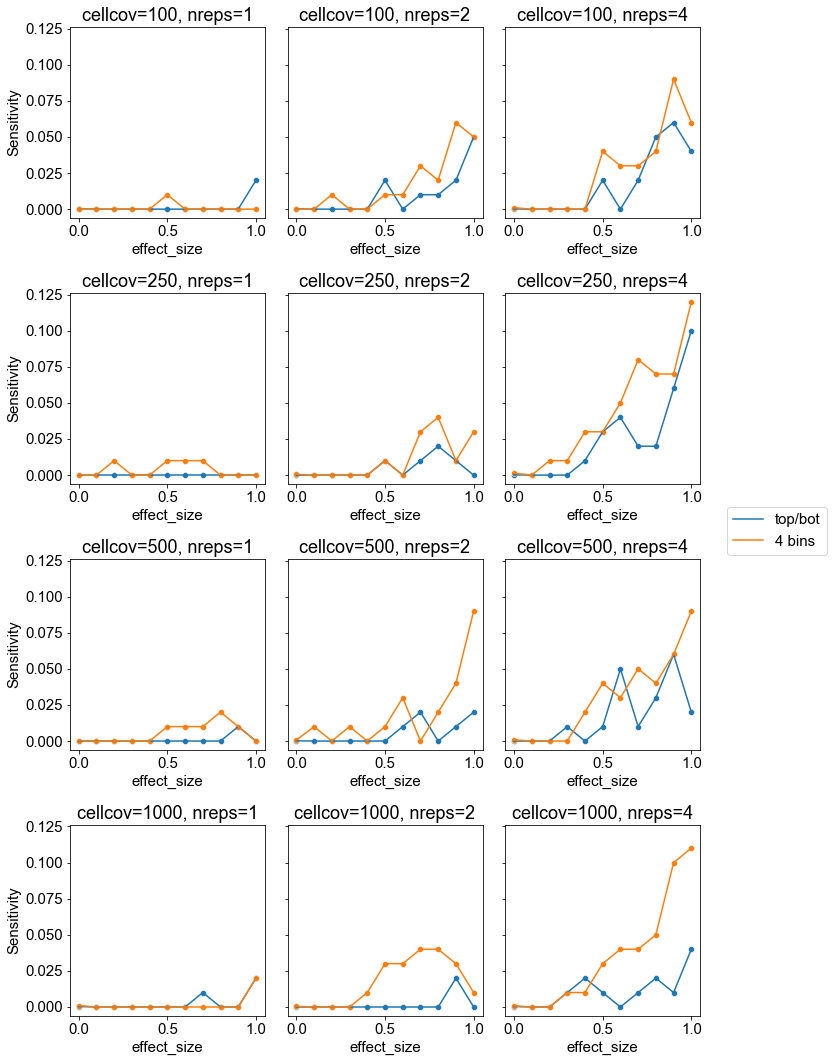

In [52]:
plt.style.use('jr')
fig, ax = plt.subplots(4,3, sharey=True, figsize=(10, 15))
for j, cov in enumerate(coverages):
    for i, nrep in enumerate(nreps):
        sns.scatterplot(data = sens_df.loc[(sens_df.sorting_mode == "topbot") & (sens_df.nrep == nrep) & (sens_df["cov"] == cov) & (sens_df.nreads == 500e4)], x="effect_size", y="top", ax = ax[j, i])
        sns.lineplot(data = sens_df.loc[(sens_df.sorting_mode == "topbot") & (sens_df.nrep == nrep) & (sens_df["cov"] == cov) & (sens_df.nreads == 500e4)], x="effect_size", y="top", ax = ax[j, i], label='top/bot')
        
        sns.scatterplot(data = sens_df.loc[(sens_df.sorting_mode == "bins") & (sens_df.nrep == nrep) & (sens_df["cov"] == cov) & (sens_df.nreads == 250e4)], x="effect_size", y="any", ax = ax[j, i])
        sns.lineplot(data = sens_df.loc[(sens_df.sorting_mode == "bins") & (sens_df.nrep == nrep) & (sens_df["cov"] == cov) & (sens_df.nreads == 250e4)], x="effect_size", y="any", ax = ax[j, i], label='4 bins')
        ax[j, i].set_title(f"cellcov={cov/3500:.0f}, nreps={nrep}")
        ax[j, i].get_legend().remove()
plt.setp(ax, ylabel="Sensitivity")

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
fig.savefig("sensitivity.pdf", bbox_inches="tight")